

# Project: Investigate a Dataset - [Soccer]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>Here we have a dataset from Kaggle for European Football Leagues that includes data for every game, player, team ... etc, from the season 2008/2009 till 2015/2016

We have 8 sheets of datasets.

### Question(s) for Analysis
> 1- Which team has scored the most goals of all times ?
<br>
2- How many goals did they score ?
<br>
3- In which league are they playing ?
<br>
4- Which league is the best according to the goals scored ?
<br>
5- Visualization of Goals scored in each league.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

  Using cached pandas-0.25.0.tar.gz (12.6 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): still running...
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pandas
Failed to build pandas
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.4
    Uninstalling pandas-1.4.4:
      Successfully uninstalled pandas-1.4.4
  Running setup.py install for pandas: started
  Running setup.py install for pandas: still running...
  Running setup.py install for pandas: finished with status 'error'
  Rolling back uninstall of pandas
  Moving to c:\users\nador\anaconda3\lib\site-packages\pandas-1.4.4.dist-info\
   from C:\Users\nador\anaconda3\Lib\site-packages\~andas-1.4.4.dist-info
  Moving to c:\users\nador\anaconda3\lib\site-packages\pandas\
   from C:\Users\nador\anaconda3\Lib\site-packages\~andas


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [909 lines of output]
  C:\Users\nador\AppData\Local\Temp\pip-install-_w1b0pts\pandas_fb5f55c131374b1e8a9fc3ce566b886b\setup.py:53: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
    _CYTHON_INSTALLED = ver >= LooseVersion(min_cython_ver)
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-39
  creating build\lib.win-amd64-cpython-39\pandas
  copying pandas\conftest.py -> build\lib.win-amd64-cpython-39\pandas
  copying pandas\testing.py -> build\lib.win-amd64-cpython-39\pandas
  copying pandas\_typing.py -> build\lib.win-amd64-cpython-39\pandas
  copying pandas\_version.py -> build\lib.win-amd64-cpython-39\pandas
  copying pandas\__init__.py -> build\lib.win-amd64-cpython-39\pandas
  creating build\lib.win-amd64-cpython-39\pandas\api
  copying pandas\api\__init__.py

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
match = pd.read_csv('Match.csv') 
team_attr = pd.read_csv('Team_Attributes.csv')
league = pd.read_csv('League.csv')
player = pd.read_csv('Player.csv')
country = pd.read_csv('Country.csv')
player_attr = pd.read_csv('Player_Attributes.csv')
team = pd.read_csv('Team.csv')

In [4]:
match.head(1)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.0,1.65,3.4,4.5,1.78,3.25,4.0,1.73,3.4,4.2


In [5]:
team_attr.head(1)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover


In [6]:
match.shape

(25979, 115)

In [7]:
match.head(1)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.0,1.65,3.4,4.5,1.78,3.25,4.0,1.73,3.4,4.2


In [8]:
match.isnull().sum()

id                0
country_id        0
league_id         0
season            0
stage             0
              ...  
GBD           11817
GBA           11817
BSH           11818
BSD           11818
BSA           11818
Length: 115, dtype: int64

In [9]:
#removing the betting odds from df as we're not going to use them in our analysis
match_filtered = match.iloc[:,0:85]
match_filtered.head(1)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
match_filtered.shape

(25979, 85)

In [11]:
match_filtered.duplicated().sum().sum()

0

In [12]:
match_filtered.isnull().sum(axis = 0)

id                0
country_id        0
league_id         0
season            0
stage             0
              ...  
foulcommit    11762
card          11762
cross         11762
corner        11762
possession    11762
Length: 85, dtype: int64

In [13]:
match_filtered.describe()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,...,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
count,25979.000000,25979.000000,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,25979.000000,25979.000000,24158.000000,...,24701.000000,24686.000000,24658.000000,24644.000000,24666.000000,24744.000000,24638.000000,24651.000000,24538.000000,24425.000000
mean,12990.000000,11738.630317,11738.630317,18.242773,1.195429e+06,9984.371993,9984.475115,1.544594,1.160938,0.999586,...,107614.617424,91126.781293,95083.910617,109800.936901,102308.262588,97898.056014,109265.114214,111087.003448,107149.115943,104932.876970
std,7499.635658,7553.936759,7553.936759,10.407354,4.946279e+05,14087.453758,14087.445135,1.297158,1.142110,0.022284,...,113758.447918,101438.583414,103845.905029,112450.715516,110861.276758,107359.030969,116358.092456,116492.957656,112397.540326,110237.525957
min,1.000000,1.000000,1.000000,1.000000,4.831290e+05,1601.000000,1601.000000,0.000000,0.000000,0.000000,...,2790.000000,2752.000000,2752.000000,2790.000000,2625.000000,2625.000000,2625.000000,2625.000000,2770.000000,2802.000000
25%,6495.500000,4769.000000,4769.000000,9.000000,7.684365e+05,8475.000000,8475.000000,1.000000,0.000000,1.000000,...,32579.000000,30464.000000,30627.000000,33453.500000,31037.000000,30920.000000,32863.000000,33435.000000,32627.000000,32747.000000
50%,12990.000000,10257.000000,10257.000000,18.000000,1.147511e+06,8697.000000,8697.000000,1.000000,1.000000,1.000000,...,42388.000000,39892.000000,41083.000000,46212.000000,41634.500000,41433.000000,45816.000000,45860.000000,45358.000000,42652.000000
75%,19484.500000,17642.000000,17642.000000,27.000000,1.709852e+06,9925.000000,9925.000000,2.000000,2.000000,1.000000,...,159882.000000,121080.000000,145561.000000,160844.000000,151079.000000,144996.000000,163611.750000,164209.000000,161291.000000,161660.000000
max,25979.000000,24558.000000,24558.000000,38.000000,2.216672e+06,274581.000000,274581.000000,10.000000,9.000000,2.000000,...,748432.000000,705484.000000,728414.000000,746419.000000,722766.000000,750435.000000,717248.000000,722766.000000,722766.000000,726956.000000


In [14]:
#to show the whole output rows
pd.options.display.max_rows = 999

In [15]:
#to show the whole output columns
pd.options.display.max_columns = 999

In [16]:
match_filtered.dtypes

id                    int64
country_id            int64
league_id             int64
season               object
stage                 int64
date                 object
match_api_id          int64
home_team_api_id      int64
away_team_api_id      int64
home_team_goal        int64
away_team_goal        int64
home_player_X1      float64
home_player_X2      float64
home_player_X3      float64
home_player_X4      float64
home_player_X5      float64
home_player_X6      float64
home_player_X7      float64
home_player_X8      float64
home_player_X9      float64
home_player_X10     float64
home_player_X11     float64
away_player_X1      float64
away_player_X2      float64
away_player_X3      float64
away_player_X4      float64
away_player_X5      float64
away_player_X6      float64
away_player_X7      float64
away_player_X8      float64
away_player_X9      float64
away_player_X10     float64
away_player_X11     float64
home_player_Y1      float64
home_player_Y2      float64
home_player_Y3      


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [17]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

#changing data type of Date column to datetime instead of object

match_filtered['date'] = match_filtered["date"].astype('datetime64[ns]')

In [18]:
match_filtered.dtypes

id                           int64
country_id                   int64
league_id                    int64
season                      object
stage                        int64
date                datetime64[ns]
match_api_id                 int64
home_team_api_id             int64
away_team_api_id             int64
home_team_goal               int64
away_team_goal               int64
home_player_X1             float64
home_player_X2             float64
home_player_X3             float64
home_player_X4             float64
home_player_X5             float64
home_player_X6             float64
home_player_X7             float64
home_player_X8             float64
home_player_X9             float64
home_player_X10            float64
home_player_X11            float64
away_player_X1             float64
away_player_X2             float64
away_player_X3             float64
away_player_X4             float64
away_player_X5             float64
away_player_X6             float64
away_player_X7      

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Who is the Top Scorer Team of all time ?

In [19]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
# Which team scored the highest goals of all time ?
# 1- Total of Goals scored by every team :
team_goals = match_filtered.groupby(["home_team_api_id", "country_id"]).sum("home_team_goal")
team_goals

,,id,league_id,stage,match_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
home_team_api_id,country_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1601,15722,2001775,1886640,1860,141896277,996673,148,123,45.0,95.0,179.0,269.0,353.0,165.0,250.0,155.0,240.0,317.0,227.0,45.0,96.0,182.0,274.0,342.0,159.0,236.0,176.0,241.0,309.0,234.0,45.0,135.0,135.0,135.0,139.0,279.0,277.0,351.0,353.0,359.0,493.0,45.0,135.0,135.0,135.0,143.0,282.0,288.0,348.0,355.0,366.0,489.0,11685114.0,18338125.0,7539452.0,13588026.0,17038949.0,6469716.0,7247289.0,13862263.0,17294762.0,10437503.0,17862143.0,8465640.0,11224403.0,9375899.0,8751676.0,9980543.0,11860943.0,10487926.0,13015672.0,10480038.0,12266671.0,9886046.0
1773,1,54055,45,705,63553172,691124,74,73,45.0,95.0,185.0,275.0,315.0,172.0,213.0,248.0,224.0,245.0,272.0,45.0,92.0,181.0,274.0,338.0,136.0,203.0,255.0,261.0,240.0,268.0,45.0,135.0,135.0,135.0,159.0,287.0,309.0,331.0,385.0,418.0,466.0,45.0,135.0,135.0,135.0,147.0,300.0,310.0,326.0,365.0,422.0,463.0,2255980.0,5979216.0,5433877.0,4664196.0,4432627.0,3182739.0,4607229.0,4181246.0,5796146.0,5975836.0,8185432.0,4093692.0,5403840.0,6145519.0,5104671.0,7068413.0,5183626.0,5312553.0,7228441.0,8197294.0,6397965.0,8109501.0
1957,15722,2002266,1886640,1856,141815103,993825,176,123,45.0,92.0,184.0,274.0,350.0,162.0,247.0,157.0,247.0,308.0,229.0,45.0,93.0,182.0,275.0,332.0,160.0,229.0,190.0,255.0,295.0,238.0,45.0,135.0,135.0,135.0,135.0,278.0,280.0,352.0,352.0,366.0,491.0,45.0,135.0,135.0,135.0,151.0,282.0,292.0,344.0,353.0,374.0,485.0,24878014.0,16024957.0,9943272.0,10625395.0,11512280.0,15196145.0,13062135.0,15483529.0,16902299.0,18986451.0,8406741.0,7382921.0,10291805.0,9650572.0,9913188.0,9999995.0,10267402.0,11374807.0,9206755.0,12771620.0,10760048.0,8424979.0
2033,17642,1386280,1323150,1155,80153313,843557,70,92,75.0,154.0,310.0,450.0,586.0,259.0,403.0,339.0,386.0,443.0,420.0,75.0,153.0,304.0,453.0,585.0,246.0,373.0,408.0,374.0,404.0,449.0,75.0,225.0,225.0,225.0,225.0,482.0,488.0,564.0,620.0,659.0,794.0,75.0,225.0,225.0,225.0,229.0,492.0,508.0,546.0,636.0,702.0,773.0,6439035.0,11486905.0,11433436.0,11504098.0,12266094.0,11623638.0,8618023.0,7685511.0,6611019.0,10458407.0,11188968.0,6311099.0,8563178.0,9146488.0,9112917.0,9901780.0,7767357.0,8739306.0,8068748.0,8314757.0,10292729.0,9945628.0
2182,15722,2001652,1886640,1920,141817943,992025,215,91,45.0,90.0,180.0,270.0,360.0,162.0,244.0,161.0,245.0,309.0,229.0,45.0,97.0,186.0,271.0,335.0,160.0,240.0,177.0,250.0,300.0,233.0,45.0,135.0,135.0,135.0,135.0,280.0,284.0,350.0,353.0,359.0,492.0,45.0,135.0,135.0,135.0,147.0,281.0,285.0,347.0,355.0,369.0,489.0,2752850.0,13062876.0,8557281.0,10127723.0,11334155.0,12573987.0,13002414.0,16644629.0,15431331.0,13726922.0,13800675.0,10036595.0,12154544.0,10519042.0,9316134.0,8682547.0,10504713.0,10840866.0,12187949.0,11347883.0,11619503.0,9178338.0
2183,15722,1223965,1179150,1125,64043685,506674,96,68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [20]:
#top scorer team at home api & country id
top_scorer_id = team_goals["home_team_goal"].idxmax()
top_scorer_id

(8633, 21518)

In [21]:
#how many goals did they score ?
team_goals["home_team_goal"].max()

505

In [22]:
top_scorer_team_name = team.query('team_api_id == 8633')['team_long_name'];
top_scorer_team_name

256    Real Madrid CF
Name: team_long_name, dtype: object

In [23]:
top_scorer_team_country = league.query('id == 21518')['name'];
top_scorer_team_country

9    Spain LIGA BBVA
Name: name, dtype: object

### Best League Based on Goals Scored ?

In [28]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
#2- Best league with the most goals scored of all time

##insert a total goals per league column

total_goals_scored = match_filtered['home_team_goal'] + match_filtered["away_team_goal"]
match_filtered.insert(11, "total_goals", total_goals_scored)
match_filtered

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,total_goals,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession
0,1,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22,1992091,10190,10191,1,0,1,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,5.0,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,5.0,1.0,3.0,3.0,3.0,3.0,6.0,6.0,8.0,8.0,8.0,11.0,1.0,3.0,3.0,3.0,3.0,6.0,6.0,8.0,8.0,8.0,11.0,42231.0,678384.0,95220.0,638592.0,413155.0,45780.0,171229.0,67333.0,119839.0,143790.0,195215.0,462944.0,563066.0,8800.0,67304.0,158253.0,133126.0,186524.0,93223.0,121115.0,232110.0,289732.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,25976,24558,24558,2015/2016,9,2015-09-23,1992092,9824,10199,1,2,3,1.0,3.0,5.0,7.0,2.0,4.0,6.0,8.0,5.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,7.0,3.0,5.0,7.0,1.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,9.0,11.0,11.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,10.0,10.0,10.0,332

In [29]:
league_goals = match_filtered.groupby(["country_id"]).sum("total_goals")
league_goals

,id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,total_goals,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
country_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1493856,1728,27252,1941117530,23864908,23864908,2781,2060,4841,1520.0,3157.0,6107.0,9212.0,10818.0,4784.0,6767.0,8921.0,9553.0,7487.0,9089.0,1520.0,3147.0,6117.0,9225.0,10948.0,4674.0,6775.0,8862.0,9488.0,7612.0,9066.0,1520.0,4560.0,4560.0,4560.0,5255.0,10008.0,10503.0,10837.0,11972.0,14501.0,15537.0,1520.0,4560.0,4560.0,4560.0,5173.0,10038.0,10486.0,10852.0,11985.0,14437.0,15562.0,133805791.0,169184820.0,159278510.0,167189396.0,191311139.0,161146279.0,162563353.0,190374893.0,206453281.0,183914295.0,205456204.0,132955033.0,168802495.0,159421304.0,171765942.0,195725986.0,159542615.0,158022877.0,194504578.0,205029162.0,183243101.0,211932240.0
1729,9875440,5256160,59280,3583450695,27792516,27792516,4715,3525,8240,3040.0,6172.0,12251.0,18308.0,23696.0,8623.0,13966.0,15836.0,19419.0,16651.0,17040.0,3040.0,6214.0,12281.0,18360.0,23467.0,8559.0,13751.0,15774.0,19179.0,17456.0,16914.0,3040.0,9120.0,9120.0,9120.0,9458.0,20098.0,20436.0,22110.0,23318.0,27557.0,31958.0,3040.0,9120.0,9120.0,9120.0,9570.0,20094.0,20496.0,22110.0,23398.0,27072.0,32111.0,146982767.0,224668713.0,159763408.0,156134765.0,227518118.0,200630043.0,185172018.0,200563312.0,211341643.0,200737900.0,191115576.0,148196995.0,227199032.0,158839771.0,160559017.0,228288947.0,201750871.0,194191421.0,203192250.0,202842928.0,203374347.0,189205486.0
4769,19117040,14497760,59280,3561790201,29817232,29817232,4265,3162,7427,3040.0,6196.0,12332.0,18291.0,23555.0,10675.0,14302.0,15120.0,16930.0,17540.0,17369.0,3040.0,6152.0,12301.0,18265.0,23527.0,10856.0,14257.0,15036.0,16917.0,17672.0,17326.0,3040.0,9120.0,9120.0,9126.0,9395.0,18948.0,20099.0,22254.0,24685.0,27362.0,32107.0,3040.0,9120.0,9120.0,9122.0,9392.0,18866.0,20099.0,22308.0,24634.0,27217.0,32120.0,205507084.0,327580045.0,269045619.0,267291027.0,321308697.0,309795251.0,292770976.0,317682716.0,334369818.0,309963787.0,323157325.0,207525794.0,327287490.0,263229742.0,270024007.0,332115963.0,304795836.0,299754531.0,337456169.0,340971311.0,322829691.0,320948687.0
7809,22111560,19116432,42840,2911594811,22473252,22473252,3982,3121,7103,2448.0,4965.0,9874.0,14680.0,19292.0,9563.0,12181.0,10325.0,14143.0,13958.0,13463.0,2448.0,4994.0,9885.0,14684.0,19219.0,9632.0,12085.0,10326.0,14140.0,14040.0,13453.0,2448.0,7344.0,7346.0,7348.0,7486.0,14599.0,15692.0,18255.0,19489.0,22018.0,26122.0,2448.0,7344.0,7344.0,7344.0,7498.0,14573.0,15719.0,18268.0,19475.0,21934.0,26102.0,182645403.0,207751173.0,198944733.0,204551975.0,259680358.0,208311215.0,213028135.0,238212844.0,247622938.0,224881084.0,192084716.0,183160606.0,206232285.0,199765685.0,203124219.0,257829304.0,217091977.0,206888749.0,242798890.0,252886958.0,223662193.0,196127089.0
10257,35495005,30945369,58654,3731281552,31212831,31215792,4528,3367,7895,3018.0,6880.0,12589.0,18912.0,18463.0,9419.0,14849.0,19539.0,17308.0,14471.0,18029.

In [30]:
most_goals_league = league_goals["total_goals"].idxmax()
most_goals_league

21518

In [31]:
most_goals_number = league_goals["total_goals"].max()
most_goals_number

8412

In [32]:
best_league_name = league.query('country_id == 21518')["name"]
best_league_name

9    Spain LIGA BBVA
Name: name, dtype: object

In [33]:
country_vis = league_goals[["total_goals"]].copy()
country_vis

,total_goals
country_id,
1,4841
1729,8240
4769,7427
7809,7103
10257,7895
13274,7542
15722,4656
17642,5201
19694,4804


Text(0, 0.5, 'League')

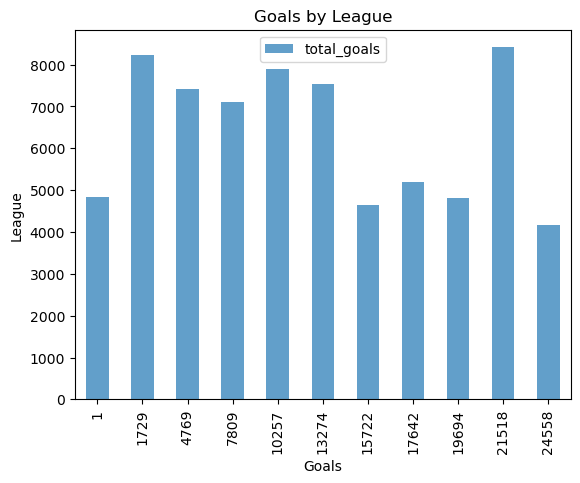

In [34]:
#visualizing the goals scored in each league
country_vis.plot(kind = 'bar', title = "Goals by League", alpha = .7)
plt.xlabel('Goals')
plt.ylabel('League')

<a id='conclusions'></a>
## Conclusions

### Here we found that :

1- Real Madrid Fc from the Spanish League has scored the highest number of goals between seasons 2008/2009 and 2015/2016 with a total of 505 goals.

2- The Spanish League teams has scored the highest number of goals of 8412 goals.

A visualisation of total goals scored in all 11 leagues has been done to give a better view.

> We had one limitation concerning the NAN cells as they're too many to be deleted and too vital to be filled with average or any other values. 


## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [36]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset_Final.ipynb'])

1